In [29]:
#from google.colab import drive
#drive.mount('/gdrive')
#cd '/content/gdrive/My Drive/AA'

In [3]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## Ejercicio 1

In [31]:
'''
Funcion que muestra por pantalla una imagen a color o en escala de grises según el flagColor pasado
'''

def leer_imagen(filename,flagColor):
    
    #Leemos la imagen 
    img = cv.imread(filename,flagColor)
    
    #Calculamos el numero de canales
    dim = img.ndim #también vale img.shape[2]
    
    #Visualizamos la imagen
    plt.figure(1)
    plt.imshow(img[:,:,::-1] if dim == 3 else img, cmap='gray')
    cv.imwrite('original.jpg',img)

    #Si la imagen es a color la ponemos en gris
    if dim == 3: 
        img3 = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        plt.figure(2)
        plt.imshow(img3,cmap='gray')
        cv.imwrite('Grises.jpg',img3)
      
    

        
    

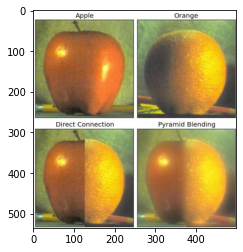

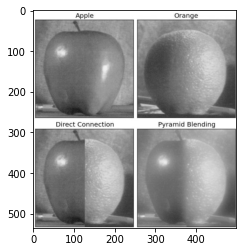

In [32]:
filename = 'orapple.jpg'
flagColor = 1
leer_imagen(filename,flagColor)


## Ejercicio 2 :

Escribir una función que permita visualizar una matriz de números reales cualquiera arbitraria, tanto monobanda como tribanda (pintaI(im)). Para ello se deberá escalar el rango de cada banda al intervalo [0,1] sin pérdida de información. 

In [33]:
def visualizar_matrices(mono,tri):
    
    #Normalizamos matriz monobanda y la imprimimos sin los ejes
    normalizado_mb = ( mat_mb-mat_mb.min() ) / (mat_mb-mat_mb.min()).max()
    plt.figure(1)
    plt.axis('off')
    print(normalizado_mb,"\n============================================================\n")
    plt.imshow(normalizado_mb, cmap = 'gray',aspect='equal')
    
    
    #Normalizamos matriz tribanda y la imprimimos sin los ejes
    normalizado_tb = ( mat_tb-mat_tb.min() ) / (mat_tb-mat_tb.min()).max()
    plt.figure(2)
    plt.xticks([]), plt.yticks([])
    print(normalizado_tb)
    plt.imshow(normalizado_tb,aspect='equal')
    


[[0.41699019 0.42543123 0.91375446]
 [0.         1.         0.1636745 ]
 [0.08361149 0.37313138 0.916222  ]] 

[[[0.32904039 0.03782556 0.18474463]
  [0.86349261 0.88405932 0.43088614]
  [0.70961312 0.8808039  0.46332989]]

 [[0.41074684 0.99976225 0.01958005]
  [0.05759432 0.         0.2380283 ]
  [0.57268747 1.         0.62487139]]

 [[0.62853514 0.53518057 0.17763424]
  [0.56229588 0.22193822 0.150769  ]
  [0.62681793 0.54448723 0.38610574]]]


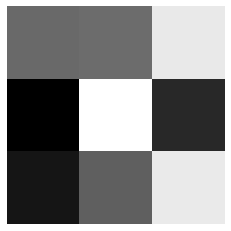

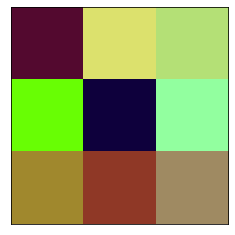

In [34]:
#Creamos una matriz 3x3 de numero aleatorios en el rango [0,100] (MONOBANDA y TRIBANDA)
mat_mb = np.random.rand(3,3)*255
mat_tb = np.random.rand(3,3,3)*255

visualizar_matrices(mat_mb,mat_tb)



## Ejercicio 3:
__Escribir una función que visualice varias imágenes distintas a la vez (concatenando las imágenes en una última imagen final): pintaMI(vim). (vim será una secuencia de imágenes) ¿Qué pasa si las imágenes no son todas del mismo tipo (nivel de gris, color, blanco-negro)?__

In [8]:
def pintaMI(vim):
    
    #Redimensionamos las matrices de las imágenes para que tengan los mismos pixeles
    
    #Obtenemos el máximo de filas y de columnas
    width  = max(im.shape[1] for im in vim)
    heigth = max(im.shape[0] for im in vim)
    
    #Redimensionamos las filas y columnas de todas las imagenes
    for i in range(len(vim)):
        vim[i] = cv.resize(vim[i],(heigth-100,width-100))
        
    #Convertimos imagenes monocanal a tricanal
    for im_i in range(len(vim)):
        if vim[im_i].ndim != 3:
            vim[im_i] = cv.cvtColor(vim[im_i],cv.COLOR_GRAY2BGR) 
    
    #Concatenamos horizontalmente
    imc = cv.hconcat(vim) #Para concatenar verticalmente usar vconcat
    
    #Mostramos imágenes
        # plt.figure      --> aumentamos el tamaño de la visualizacion
        # plt.axis('off') --> eliminamos los ejes
        # cv.imwrite      --> para guardar la imagen en un archivo
    plt.figure(figsize=(20,20))
    plt.axis('off')
    plt.imshow(imc[:,:,::-1] if imc.ndim == 3 else imc, cmap='gray')
    cv.imwrite('ejercicio2.jpg',imc)
    
    


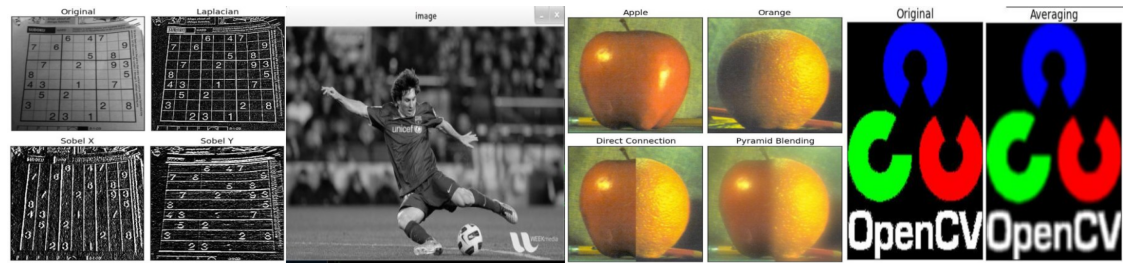

In [9]:
ej3_im1 = cv.imread('dave.jpg')
ej3_im2 = cv.imread('messi.jpg')
ej3_im3 = cv.imread('orapple.jpg')
ej3_im4 = cv.imread('pepe.jpg')
#ej3_im4 = cv.cvtColor(ej3_im4,cv.COLOR_BGR2GRAY)
#(thresh, ej3_im4) = cv.threshold(ej3_im4, 127, 255, cv.THRESH_BINARY)

vim = [ej3_im1,ej3_im2,ej3_im3,ej3_im4]
pintaMI(vim)




## Ejercicio 4 
__Escribir una función que modifique el color en la imagen de cada uno de los elementos de una lista de coordenadas de píxeles. En concreto, los alumnos deben insertar un cuadro azul de 100x100 pixeles en el centro de la imagen a modificar.__

In [37]:
def cuadrozul(rr):

    #Obtenemos las filas y columnas que tiene la foto 
    raw = rr.shape[0]
    col = rr.shape[1]

    #Calculamos el punto medio en entero
    y = int(raw/2)
    x = int(col/2)

    
    lado = 50
    #Modificamos los pixeles de color azul en formato BGR en la matriz 
    #Lo hacemos en el centro de la imagen y en los tres canales 
    rr[y-lado:y+lado,x-lado:x+lado,:] = [255,0,0]
    
    #Mostramos la imagen y la guardamos
    plt.figure(1)
    plt.imshow(rr[:,:,::-1] if rr.ndim == 3 else rr, cmap='gray')
    cv.imwrite('ejercicio4.jpg',rr)



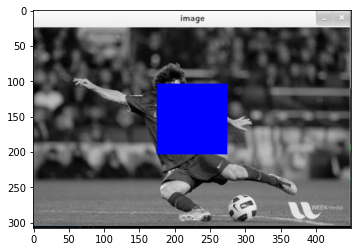

In [38]:
rr = cv.imread('messi.jpg')
cuadrozul(rr)

## Ejercicio 5
__Una función que sea capaz de representar varias imágenes con sus títulos en una misma ventana__

In [39]:

'''
Función que muestra en una única ventana varias imágenes con sus respectivos títulos
    - vim:  Vector de imágenes
    - vti:  Vector de títulos
    - raws: Número de filas que queremos que tenga la representación
'''
def joinImgTitles(vim,vti,raws):  
    #Calculamos el número de columnas
    col = int(len(vim)/raws)  
    #Para cada imagen hacemos un subplot y mostramos la figura con su título
    for i in range(len(vim)):
        plt.subplot(raws,col,1+i)
        plt.imshow(vim[i][:,:,::-1] if vim[i].ndim == 3 else vim[i], cmap='gray')
        plt.title(vti[i])
        plt.axis('off')

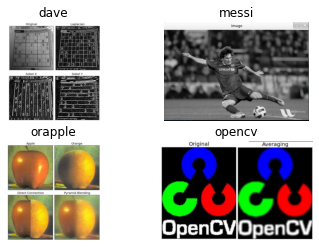

In [40]:
ej5_im1 = cv.imread('dave.jpg')
ej5_im2 = cv.imread('messi.jpg')
ej5_im3 = cv.imread('orapple.jpg')
ej5_im4 = cv.imread('pepe.jpg')

vim = [ej5_im1,ej5_im2,ej5_im3,ej5_im4]
vti = ['dave','messi','orapple','opencv']
joinImgTitles(vim,vti,2)

## Bibliografía
https://pybonacci.org/2012/06/11/como-crear-matrices-en-python-con-numpy/  

https://pybonacci.org/2013/01/11/numeros-aleatorios-en-python-con-numpy-y-scipy/  

https://www.delftstack.com/es/howto/python/resize-image-python/    

https://noemioocc.github.io/posts/Cambio-de-espacio-de-color-openCV-python/ 

https://noemioocc.github.io/posts/Cambio-de-espacio-de-color-openCV-python/

https://techtutorialsx.com/2019/04/13/python-opencv-converting-image-to-black-and-white/

https://note.nkmk.me/en/python-opencv-hconcat-vconcat-np-tile/

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html#matplotlib.pyplot.imshow

https://docs.opencv.org/3.4.15/d8/d01/group__imgproc__color__conversions.html#gga4e0972be5de079fed4e3a10e24ef5ef0a95d70bf0c1b5aa58d1eb8abf03161f21